In [35]:
import sys
import os
import numpy as np
from time import time
sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel
from mathematical_models.f_on_f import FunctionOnFunctionModel
from mathematical_models.s_on_s import ScalarOnScalarModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.nbdo import NBDO


sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results

### Settings

In [42]:
start_time = time()
N = 180 # runs
Kx = [[15]]
epochs = 100
order = 2
s_on_s_model = ScalarOnScalarModel(Kx=Kx[0], order=order)
optimizer_s_on_s = NBDO(model=s_on_s_model, latent_dim=4)
optimizer_s_on_s.compute_train_set(num_designs=1_000, runs=N, type="random")
history = optimizer_s_on_s.fit(epochs=epochs, patience=5, batch_size=2**8)
best_cr, best_des = optimizer_s_on_s.optimize()
end_time = time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

Epoch 1/100
4/4 [==============================] - 6s 579ms/step - loss: 38584784.0000 - val_loss: 138.3598
Epoch 2/100
4/4 [==============================] - 2s 456ms/step - loss: 98.5005 - val_loss: 43.6619
Epoch 3/100
4/4 [==============================] - 2s 391ms/step - loss: 36.0925 - val_loss: 23.1005
Epoch 4/100
4/4 [==============================] - 2s 391ms/step - loss: 20.4121 - val_loss: 15.0136
Epoch 5/100
4/4 [==============================] - 2s 400ms/step - loss: 13.5993 - val_loss: 10.7613
Epoch 6/100
4/4 [==============================] - 2s 456ms/step - loss: 9.9186 - val_loss: 8.1447
Epoch 7/100
4/4 [==============================] - 2s 435ms/step - loss: 7.6099 - val_loss: 6.4943
Epoch 8/100
4/4 [==============================] - 2s 393ms/step - loss: 6.1555 - val_loss: 5.4460
Epoch 9/100
4/4 [==============================] - 2s 391ms/step - loss: 5.2199 - val_loss: 4.7390
Epoch 10/100
4/4 [==============================] - 2s 401ms/step - loss: 4.5764 - val_loss:

In [43]:
best_cr

2.3198885424474156

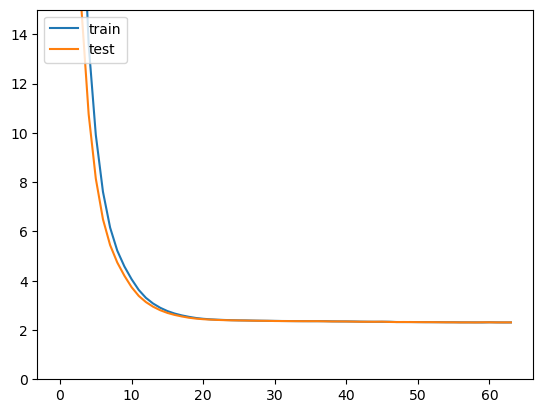

In [46]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 15)
plt.show()